<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_299_train_swapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UVA 299 Train Swapping

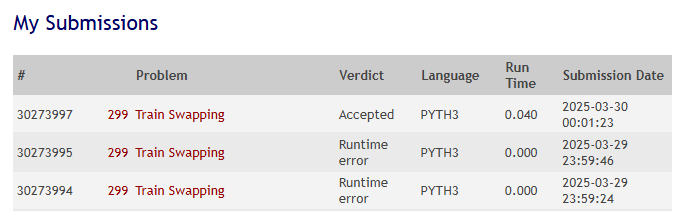

**@PDF: [UVA 299 - Train Swapping](https://onlinejudge.org/external/2/299.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

At an old railway station, you may still encounter one of the last remaining "train swappers". A train swapper is an employee of the railroad, whose sole job it is to rearrange the carriages of trains.

Once the carriages are arranged in the optimal order, all the train driver has to do, is drop the carriages off, one by one, at the stations for which the load is meant.

The title "train swapper" stems from the first person who performed this task, at a station close to a railway bridge. Instead of opening up vertically, the bridge rotated around a pillar in the center of the river. After rotating the bridge 90 degrees, boats could pass left or right.

The first train swapper had discovered that the bridge could be operated with at most two carriages on it. By rotating the bridge 180 degrees, the carriages switched place, allowing him to rearrange the carriages (as a side effect, the carriages then faced the opposite direction, but train carriages can move either way, so who cares).

Now that almost all train swappers have died out, the railway company would like to automate their operation. Part of the program to be developed, is a routine which decides for a given train the least number of swaps of two adjacent carriages necessary to order the train. Your assignment is to create that routine.

## Input

The input contains on the first line the number of test cases (N). Each test case consists of two input lines. The first line of a test case contains an integer L, determining the length of the train $(0 \le L \le 50)$. The second line of a test case contains a permutation of the numbers 1 through L, indicating the current order of the carriages. The carriages should be ordered such that carriage 1 comes first, then 2, etc. with carriage L coming last.

## Output

For each test case output the sentence: 'Optimal train swapping takes S swaps.' where S is an integer.

## Sample Input

3\
3\
1 3 2\
4\
4 3 2 1\
2\
2 1


## Sample Output

Optimal train swapping takes 1 swaps.\
Optimal train swapping takes 6 swaps.\
Optimal train swapping takes 1 swaps.

In [ ]:
import sys

# Problem: UVA 299 - Train Swapping
# Goal: Find the minimum number of adjacent swaps to sort a permutation of carriages (numbers 1 to L).

# --- Data Structures and Algorithms (DSA) Analysis ---
#
# Core Problem: The problem asks for the minimum number of swaps of *adjacent* elements
# required to sort a sequence. This is a classic problem equivalent to counting the
# number of *inversions* in the sequence.
#
# Inversion Definition: An inversion is a pair of indices (i, j) such that i < j but array[i] > array[j].
# Each adjacent swap can decrease the number of inversions by exactly 1. Therefore, the minimum
# number of adjacent swaps needed to sort the array is precisely the total number of inversions.
#
# Algorithm Choice: Bubble Sort
#   - Why Bubble Sort? While algorithms like Merge Sort can count inversions faster
#     asymptotically (O(L log L)), Bubble Sort has a direct relationship with the problem statement.
#     It works by repeatedly comparing and swapping adjacent elements that are in the wrong order.
#     The total number of swaps performed by Bubble Sort *is* the number of inversions.
#   - Elegance & Simplicity: For this problem, Bubble Sort is arguably more "elegant" because
#     it directly simulates the process described (adjacent swaps) to reach the sorted state.
#   - Efficiency: The constraint L <= 50 [cite: 12] means the O(L^2) time complexity of Bubble Sort
#     (at most 50*50 = 2500 comparisons/swaps per test case) is perfectly acceptable and efficient enough.
#
# Data Structure: Python List
#   - A simple Python list (`carriages` or its copy `arr`) is used to store the permutation
#     of train carriages. Lists provide O(1) access time by index and support efficient swapping.
#
# Function `count_swaps`: Implements the Bubble Sort algorithm to count inversions (swaps).

def count_swaps(carriages):
    """
    Calculates the minimum number of adjacent swaps required to sort the given
    list of carriages. This is equivalent to counting the inversions.

    Args:
        carriages (list): A list of integers representing the train carriages permutation.

    Returns:
        int: The total number of adjacent swaps (inversions).

    Algorithm: Bubble Sort
        - Iterates through the list multiple times.
        - In each pass, it compares adjacent elements.
        - If an adjacent pair is out of order (arr[j] > arr[j+1]), they are swapped,
          and the swap counter is incremented.
        - The process naturally counts all inversions as swaps are made.

    Time Complexity: O(L^2), where L = len(carriages). Nested loops lead to quadratic time.
                     Suitable for L <= 50.
    Space Complexity: O(L) if a copy is made (as done here with `arr = list(carriages)`),
                      or O(1) auxiliary space if sorted in-place. Making a copy is safer
                      if the original list might be needed elsewhere, though not required by this problem.
    """
    L = len(carriages)
    # Create a copy to avoid modifying the original list passed to the function.
    arr = list(carriages)
    swaps = 0

    # Outer loop: Controls the number of passes. After 'i' passes, the last 'i' elements
    # are in their correct sorted positions.
    for i in range(L):
        # Optimization: If a pass completes with no swaps, the list is already sorted,
        # and we can stop early.
        made_swap_in_pass = False
        # Inner loop: Compares adjacent elements from the start up to the already sorted part.
        for j in range(0, L - i - 1):
            # Comparison: Check if the adjacent pair is an inversion.
            if arr[j] > arr[j+1]:
                # Swap: Perform the adjacent swap.
                arr[j], arr[j+1] = arr[j+1], arr[j]
                # Count: Increment the swap counter.
                swaps += 1
                made_swap_in_pass = True

        # Early exit if the list is sorted.
        if not made_swap_in_pass:
            break

    return swaps

# --- Main Program Logic ---

# Read the number of test cases (N) from the first line[cite: 11].
N = int(sys.stdin.readline().strip())

# Process each test case.
for _ in range(N):
    # Read the length of the train (L) for the current test case[cite: 12].
    L = int(sys.stdin.readline().strip())

    # Read the permutation of carriages.
    # Handle the edge case where L might be 0.
    if L == 0:
        # Read and discard the empty line representing carriages.
        sys.stdin.readline()
        carriages = [] # An empty train requires 0 swaps.
    else:
        # Read the space-separated numbers, strip whitespace, split into strings,
        # and map each string to an integer, creating the list of carriages[cite: 13].
        carriages = list(map(int, sys.stdin.readline().strip().split()))

    # Calculate the minimum number of swaps using the chosen algorithm.
    min_swaps = count_swaps(carriages)

    # Output the result in the specified format for each test case[cite: 15].
    print(f"Optimal train swapping takes {min_swaps} swaps.")